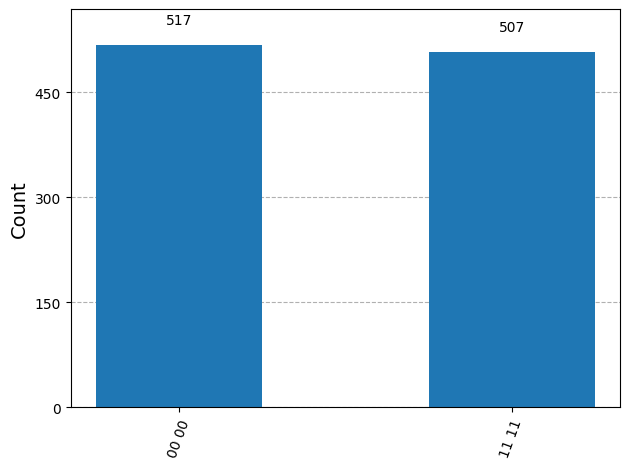

In [ ]:
# import qiskit
# from qiskit import *
# from qiskit_aer import Aer
# from qiskit.visualization import plot_histogram, plot_bloch_multivector

# circuit = QuantumCircuit(2, 2)
# circuit.h(0)
# circuit.cx(0, 1)
# circuit.measure([0, 1], [0, 1])

# simulator = Aer.get_backend('qasm_simulator')

# #result = execute(circuit, backend=simulator, shots=1024).result()
# compiled_circuit = qiskit.transpile(circuit, backend=simulator)
# compiled_circuit.measure_all() 
# result = simulator.run(compiled_circuit, shots=1024).result()

# counts = result.get_counts()
# plot_histogram(counts)

In [ ]:
import qiskit
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.visualization import plot_distribution,plot_histogram


circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

service = QiskitRuntimeService(channel="ibm_quantum",token="6c34f27f6fcf474d7acf09a3beafa76bb94ce1f7f367c80dbb9bdbff00f55a62f414ae6a4c277a0500367525370d30668e99da320d5d70b57c8103c16109a782")

backend = service.least_busy(simulator=False,operational=True)
# sampler = Sampler(backend)
# job = sampler.run([circuit])

transpiled_circuit = qiskit.transpile(circuit, backend=backend)
sampler = Sampler(backend)
job = sampler.run([transpiled_circuit])

print(f"backend: {backend.name}")
print(f"job status: {job.status()}")
print(f"job id: {job.job_id()}")

result = job.result()
print(result)

#plot_histogram(result[0].data.measurement.get_counts())
#plot_histogram(result[0].data.meas.get_counts())

# quasi_dist = result[0]
# print(quasi_dist)

#plot_distribution(dict(quasi_dist), title="Sampler Quasi-Probability Distribution")


C:\Users\murth\AppData\Local\Temp\ipykernel_40492\2238779254.py:12: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService(channel="ibm_quantum",token="6c34f27f6fcf474d7acf09a3beafa76bb94ce1f7f367c80dbb9bdbff00f55a62f414ae6a4c277a0500367525370d30668e99da320d5d70b57c8103c16109a782")
